<a href="https://colab.research.google.com/github/aossmajed/Linear-Discriminate-Function/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aoss Majed Sultan Zaid**

 
 


#**1-Linear Discriminant Function**



**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import numpy as np

**Load  Data**

In [ ]:
iris = datasets.load_iris()
X_DATA =iris.data
Y_DATA =iris.target
target_names=iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Split Data( %85 , %15)**

In [ ]:
X_tr=X_DATA[:40]
X_tr= np.append(X_tr, X_DATA[50:90])
X_tr= np.append(X_tr, X_DATA[100:140])
X_tr=np.reshape(X_tr,(120,4))

Y_tr=Y_DATA[:40]
Y_tr=np.append(Y_tr,Y_DATA[50:90])
Y_tr=np.append(Y_tr,Y_DATA[100:140])

X_te=X_DATA[40:50]
X_te=np.append(X_te,X_DATA[90:100])
X_te=np.append(X_te,X_DATA[140:])
X_te=np.reshape(X_te,(30,4))

Y_te=Y_DATA[40:50]
Y_te=np.append(Y_te,Y_DATA[90:100])
Y_te=np.append(Y_te,Y_DATA[140:])

**Get Z Matrix**

In [ ]:
X_tr2=X_tr[:,1:].copy()
N = len(X_tr2)
X_tr2 =np.c_[X_tr2, np.ones(N) ]
# print(X_tr2)
Z1=[]
Z2=[]
Z3=[]
for k in range(0,3):
     if k==0:
         for i in range ( 0, len ( X_tr2 ) ):
             if i<40:
                 Z1.append(X_tr2[i])
             else:
                 Z1.append(X_tr2[i]*-1)

     if k==1:
         for i in range ( 0, len ( X_tr2 ) ):
             if i>=40 and i<80:
                 Z2.append(X_tr2[i])
             else:
                 Z2.append(X_tr2[i]*-1)
     if k == 2:
            for i in range ( 0, len ( X_tr2 ) ):
                if  i>=80:
                    Z3.append ( X_tr2[i] )
                else:
                    Z3.append ( X_tr2[i] * -1 )


Z1=np.array(Z1)
Z2=np.array(Z2)
Z3=np.array(Z3)

**Apply LDF Equation**

In [ ]:
def LDF (Z):
     b = np.ones (len(Z))
     ZT = Z.T
     ZT_Z= np.dot(ZT,Z)
     ZT_Z_INV= np.linalg.inv(ZT_Z)
     ZT_Z_INV_ZT =np.dot(ZT_Z_INV,ZT ) #ZT_Z_INV *ZT
     ZT_Z_INV_ZT_B =np.dot(ZT_Z_INV_ZT,b ) #ZT_Z_INV_ZT*b
     return ZT_Z_INV_ZT_B

#Get W

In [ ]:
W1=LDF(Z1)
W2=LDF(Z2)
W3=LDF(Z3)
print(W1)
print(W2)
print(W3)

[ 0.56190773 -0.29583781 -0.31512433 -0.55688464]
[-0.91126976  0.2550579  -0.61180268  2.22006923]
[ 0.34936203  0.04077991  0.92692701 -2.6631846 ]


**Multiply  W in the features of test Data**

In [ ]:
X_te2=X_te[:,1:].copy()
N2 = len(X_te2)
X_te2 =np.c_[X_te2, np.ones(N2) ]
def mult(X_te2,W):
    CLF=[]
    for i in range(0,len(X_te2)):
        CLF.append(np.sum(X_te2[i]*W))
    return CLF

OP1=mult(X_te2,W1)
OP2=mult(X_te2,W2)
OP3=mult(X_te2,W3)
print(OP1)
print(OP2)
print(OP3)

[0.9306659821854156, 0.25637670050650985, 0.7936060948365372, 0.7473773403376641, 0.8902231842638791, 0.6201283339408025, 1.0419993930407827, 0.7640223139581349, 1.015392400445943, 0.8202130874313768, -0.7757600839418728, -0.6731894179474049, -0.6574249604282627, -0.5558859485574756, -0.6919141817826733, -0.49182942829209914, -0.5795326348361891, -0.6091164157145914, -0.3862654920466318, -0.6061396274310287, -1.2279607839666675, -1.0485294465038069, -1.1472428081133834, -1.2290089200577847, -1.1766754509694337, -1.1343040008554517, -1.2300405741814655, -1.039766701642908, -0.9687084687192882, -0.9471580546228092]
[-0.8213404732725147, 0.2721832427914934, -0.48677927673313004, -0.9283639066867542, -1.0028669315000789, -0.3401998018605412, -0.9570237656092231, -0.461273487014493, -0.8914025789891928, -0.5524004633531603, 0.2388593873427831, -0.1969974736213791, 0.13683622846823607, 0.3540371645005469, 0.03554056404345873, -0.1766600974491599, -0.14671338863387584, -0.1212075989152388, 0.

**classification**

In [ ]:
new_name_data = np.append (target_names, ["Undetermined","New Class"])

In [ ]:
def final_op(OP1,OP2 ,OP3):
    new_y=[]
    for i in range(0,len(OP1)):
        if (OP1[i] > 0 and OP2[i] < 0 and OP3[i] < 0):
            new_y.append ( 0 )
        if (OP1[i] < 0 and OP2[i] > 0 and OP3[i] < 0):
            new_y.append ( 1 )
        if (OP1[i] < 0 and OP2[i] < 0 and OP3[i] > 0):
            new_y.append ( 2 )
        if (OP1[i] < 0 and OP2[i] > 0 and OP3[i] > 0):
            new_y.append ( 3 )
            # new_y.append ( Y_tr[i] )
        if (OP1[i] > 0 and OP2[i] < 0 and OP3[i] > 0):
            new_y.append ( 3 )
            # new_y.append ( Y_te[i] )
        if (OP1[i] > 0 and OP2[i] > 0 and OP3[i] < 0):
            new_y.append ( 3 )
            # new_y.append ( Y_te[i] )
        if (OP1[i]<0 and OP2[i]<0 and OP3[i]<0):
            new_y.append(4)
            #new_y.append ( Y_te[i] )
    return new_y

Y_NEW =final_op(OP1,OP2,OP3)

In [ ]:
print(Y_te)
print(Y_NEW)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2]


In [ ]:
X_ALL=X_tr2
X_ALL=np.append(X_ALL,X_te2)
Y_ALL=Y_tr
Y_ALL=np.append(Y_ALL,Y_NEW)
X_ALL=np.reshape(X_ALL,(150,4))

**Plot ALL Data Before LDF**

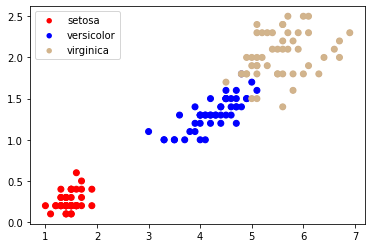

In [ ]:
colors = ['RED', 'BLUE', 'tan',"PINK","green"]
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
fig = plt.figure()
ax = fig.add_subplot()
for  D,color, group in zip( X_DATA,colors,target_names):
  X,Y = X_DATA[:,2],X_DATA[:,3]
  ax.scatter(X,Y, c=color, edgecolors='none', s=30, label=group)
plt.scatter(X_DATA[:,2],X_DATA[:,3],c=vectorizer(Y_DATA))
plt.legend(loc=2)

**Plot ALL Data After LDF**

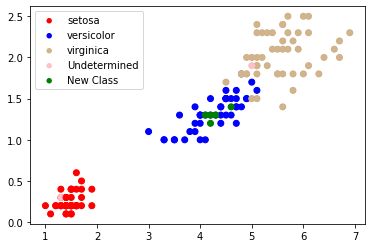

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
for  D,color, group in zip(X_ALL,colors,new_name_data):
  X,Y = X_ALL[:,1],X_ALL[:,2]
  ax.scatter(X,Y, c=color, edgecolors='none', s=30, label=group)
plt.scatter(X_ALL[:,1],X_ALL[:,2],c=vectorizer(Y_ALL))
plt.legend(loc=2)

plt.show()

**The Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy found is : %",np.round((accuracy_score(Y_NEW,Y_te))*100))

accuracy found is : % 77.0


#**2-Linear Discriminant Function (LDA)**


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
X_tra, X_tes, y_tra ,y_tes= train_test_split(X_DATA,Y_DATA,test_size=0.15,random_state=5)
LDA = LinearDiscriminantAnalysis()
A=LDA.fit(X_tra,y_tra)
y_pred = A.predict(X_tes)
print("accuracy found is : %",np.round((accuracy_score(y_pred,y_tes))*100))

y_pred


accuracy found is : % 91.0


array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0])